In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d

In [3]:
class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<Figure size 432x288 with 0 Axes>

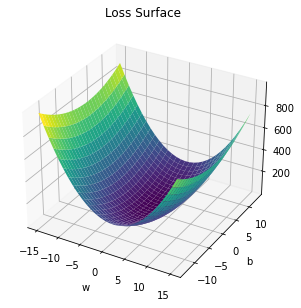

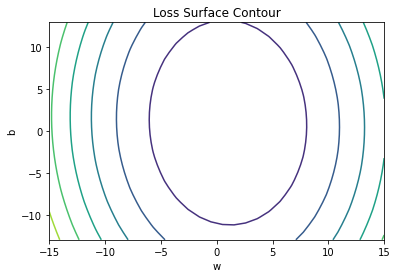

In [6]:
torch.manual_seed(1)
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size())
get_surface = plot_error_surfaces(15, 13, X, Y, 30)

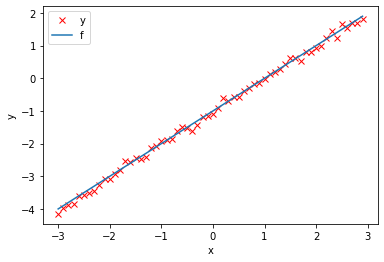

In [5]:
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [11]:
def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        yhat = w * X + b
        loss = torch.mean((yhat - Y) ** 2)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        get_surface.plot_ps()
            
        # store the loss in the list LOSS_BGD
        LOSS_BGD.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

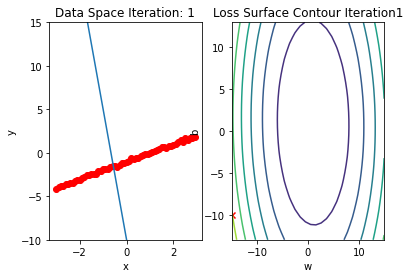

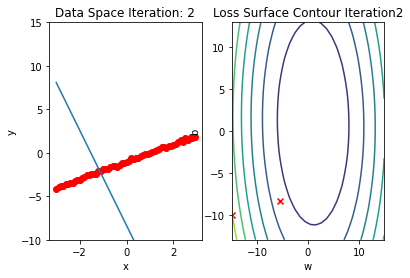

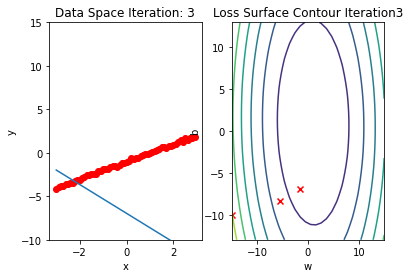

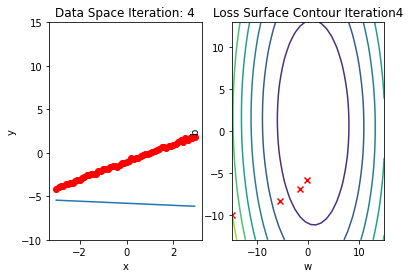

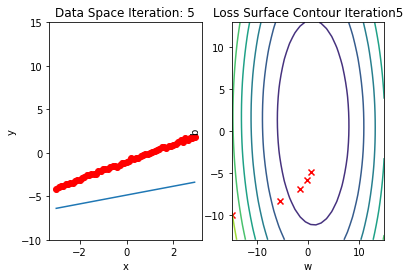

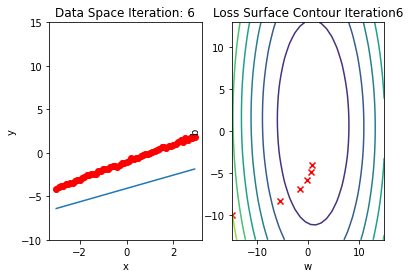

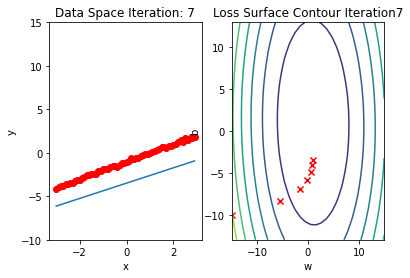

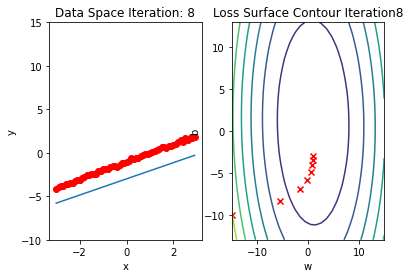

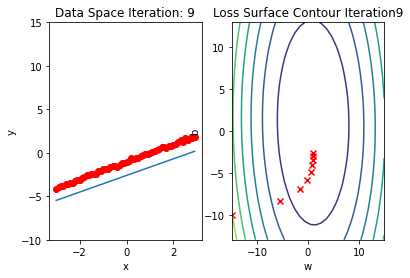

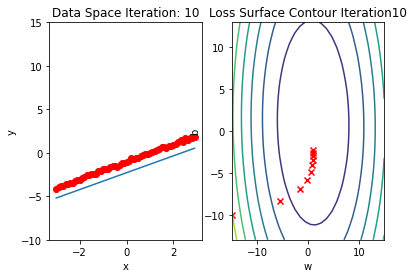

In [12]:
lr = 0.1
LOSS_BGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
train_model(10)

In [13]:
get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

In [14]:
def train_model_SGD(iter):
    
    # Loop
    for epoch in range(iter):
        
        yhat = w * X + b
        LOSS_SGD.append(criterion(Yhat, Y).tolist())
        
        for x, y in zip(X, Y):
            
            yhat = w * x + b
            loss = torch.mean((yhat - Y) ** 2)
        
            # calculate the loss 
            loss = criterion(yhat, y)

            # Section for plotting
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        
            # backward pass: compute gradient of the loss with respect to all the learnable parameters
            loss.backward()
        
            # update parameters slope and bias
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data

            # zero the gradients before running the backward pass
            w.grad.data.zero_()
            b.grad.data.zero_()
            
        #plot surface and data space after each epoch    
        get_surface.plot_ps()

In [15]:
LOSS_SGD = []
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
train_model_SGD(10)

NameError: name 'forward' is not defined

In [3]:
x = torch.tensor(3.,requires_grad=True)
y = x.pow(2) + 2*x + 2
y.backward()
print('y:', y, y.grad)
print('x:', x, x.grad)

y: tensor(17., grad_fn=<AddBackward0>) None
x: tensor(3., requires_grad=True) tensor(8.)


In [112]:
x = torch.arange(1.,5.)
y = x * 2
ysample = y + 0.1 * torch.randn(x.size()) 
print('x:',x)
print('y:',y)
print('ysample:',ysample)

w = torch.tensor(5., requires_grad = True)
for epoch in range(15):
    yhat = w * x
    loss = torch.mean((yhat - ysample).pow(2))
    print('loss:', loss, 'loss.grad:', loss.grad)
    loss.backward()
    w.data = w.data - (0.1 * w.grad)
    print('w:', w, 'w.grad:', w.grad)
    w.grad.data.zero_()



x: tensor([1., 2., 3., 4.])
y: tensor([2., 4., 6., 8.])
ysample: tensor([2.0559, 3.9324, 6.1588, 8.1827])
loss: tensor(65.8245, grad_fn=<MeanBackward0>) loss.grad: None
w: tensor(0.5564, requires_grad=True) w.grad: tensor(44.4360)
loss: tensor(16.4606, grad_fn=<MeanBackward0>) loss.grad: None
w: tensor(2.7782, requires_grad=True) w.grad: tensor(-22.2180)
loss: tensor(4.1196, grad_fn=<MeanBackward0>) loss.grad: None
w: tensor(1.6673, requires_grad=True) w.grad: tensor(11.1090)
loss: tensor(1.0344, grad_fn=<MeanBackward0>) loss.grad: None
w: tensor(2.2228, requires_grad=True) w.grad: tensor(-5.5545)
loss: tensor(0.2631, grad_fn=<MeanBackward0>) loss.grad: None
w: tensor(1.9450, requires_grad=True) w.grad: tensor(2.7772)
loss: tensor(0.0702, grad_fn=<MeanBackward0>) loss.grad: None
w: tensor(2.0839, requires_grad=True) w.grad: tensor(-1.3886)
loss: tensor(0.0220, grad_fn=<MeanBackward0>) loss.grad: None
w: tensor(2.0145, requires_grad=True) w.grad: tensor(0.6943)
loss: tensor(0.0100, grad

<ipython-input-112-483d570ccfac>:12: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print('loss:', loss, 'loss.grad:', loss.grad)


In [73]:
lr = 0.1

x = torch.arange(-2, 2, 0.2).view(-1, 1)
f = -3 * x
y = f + 0.3 * torch.randn(x.size())

w = torch.tensor(-10.0, requires_grad = True)

for epoch in range (6):
    yhat =  w * x
    loss = torch.mean((yhat - y).pow(2))
    loss.backward()
    print('loss:', loss, 'loss.grad:', loss.grad)        
    print('w.data:',w.data, ' w.grad:', w.grad)
    gradient = lr * w.grad.data
    print('gradient:', gradient)
    w.data = w.data - gradient
    print('w.data:',w.data, ' w.grad:', w.grad)
    w.grad.data.zero_()
    print('w.data:',w.data, ' w.grad.data:', w.grad.data)
    print()        


loss: tensor(65.9447, grad_fn=<MeanBackward0>) loss.grad: None
w.data: tensor(-10.)  w.grad: tensor(-18.7915)
gradient: tensor(-1.8791)
w.data: tensor(-8.1209)  w.grad: tensor(-18.7915)
w.data: tensor(-8.1209)  w.grad.data: tensor(0.)

loss: tensor(35.3645, grad_fn=<MeanBackward0>) loss.grad: None
w.data: tensor(-8.1209)  w.grad: tensor(-13.7554)
gradient: tensor(-1.3755)
w.data: tensor(-6.7453)  w.grad: tensor(-13.7554)
w.data: tensor(-6.7453)  w.grad.data: tensor(0.)

loss: tensor(18.9789, grad_fn=<MeanBackward0>) loss.grad: None
w.data: tensor(-6.7453)  w.grad: tensor(-10.0689)
gradient: tensor(-1.0069)
w.data: tensor(-5.7384)  w.grad: tensor(-10.0689)
w.data: tensor(-5.7384)  w.grad.data: tensor(0.)

loss: tensor(10.1991, grad_fn=<MeanBackward0>) loss.grad: None
w.data: tensor(-5.7384)  w.grad: tensor(-7.3705)
gradient: tensor(-0.7370)
w.data: tensor(-5.0014)  w.grad: tensor(-7.3705)
w.data: tensor(-5.0014)  w.grad.data: tensor(0.)

loss: tensor(5.4947, grad_fn=<MeanBackward0>) los

<ipython-input-73-a25fc4882b8d>:14: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print('loss:', loss, 'loss.grad:', loss.grad)


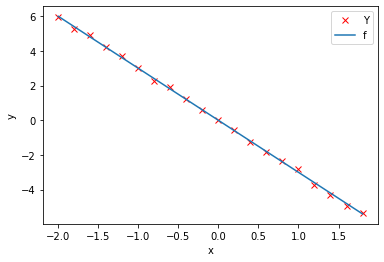

In [49]:
plt.plot(x.numpy(), y.numpy(), 'rx', label = 'Y')
plt.plot(x.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [2]:
class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [6]:
def forward(x):
    return w * x

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()


        


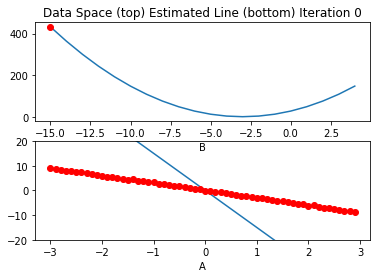

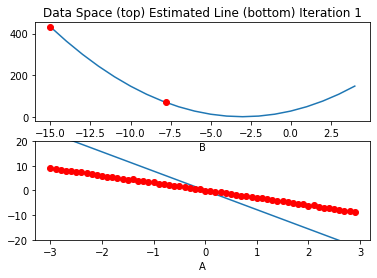

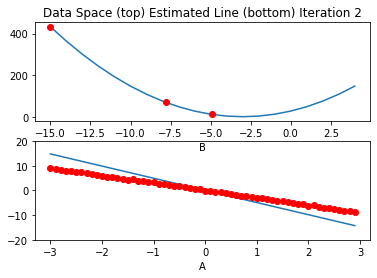

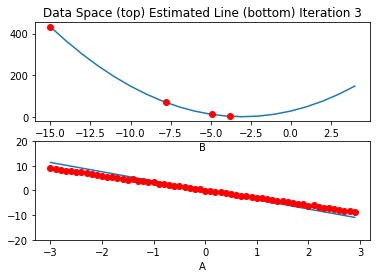

<Figure size 432x288 with 0 Axes>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X
Y = f + 0.1 * torch.randn(X.size())
w = torch.tensor(-15., requires_grad = True)

gradient_plot = plot_diagram(X, Y, w, stop = 5)
lr = 0.1
LOSS = []
train_model(4)

In [25]:
from torch import nn

class LinearRegression(nn.Module):
    def __init__(self, isize,osize):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(isize,osize)
        
    def forward(self,x):
        out = self.linear(x)
        return out
    
torch.manual_seed(1)
lr1 = LinearRegression(1, 1)
print(lr1.state_dict())

x = torch.tensor([[1.0], [2.0], [3.0]])
print(lr1(x))

OrderedDict([('linear.weight', tensor([[0.5153]])), ('linear.bias', tensor([-0.4414]))])
tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<AddmmBackward>)


In [21]:
from torch.nn import Linear
torch.manual_seed(1)
lr = Linear(in_features=1, out_features=1, bias=True)
x = torch.tensor([[1.0],[2.0]])
# x = torch.tensor([[1.0],[2.0],[3.0]])

print(lr(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


In [26]:
def forward(x):
    yhat = w * x + b
    return yhat

w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)
x = torch.tensor([[1.0], [2.0], [3.0]])
print(forward(x))

tensor([[1.],
        [3.],
        [5.]], grad_fn=<AddBackward0>)


In [64]:
u = torch.tensor(2.0, requires_grad=True)
v = torch.tensor(1.0, requires_grad=True)
f = u*v + (u*v)**2

f.backward()
print(u,v,f,u.grad)

tensor(2., requires_grad=True) tensor(1., requires_grad=True) tensor(6., grad_fn=<AddBackward0>) tensor(5.)


In [67]:
x = torch.tensor(2.0, requires_grad = True)
y = x ** 2
y.backward()
print(x,y,x.grad)

tensor(2., requires_grad=True) tensor(4., grad_fn=<PowBackward0>) tensor(4.)


In [68]:
v = torch.tensor(3.0,requires_grad=True)
z = v ** 2
print(z)

z.backward()

print('data:',z.data)
print('grad_fn:',z.grad_fn)
print('grad:',z.grad)
print("is_leaf:",z.is_leaf)
print("requires_grad:",z.requires_grad)

tensor(9., grad_fn=<PowBackward0>)
data: tensor(9.)
grad_fn: <PowBackward0 object at 0x7fdcbeeaff40>
grad: None
is_leaf: False
requires_grad: True


<ipython-input-68-213cac7db0a4>:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print('grad:',z.grad)


In [71]:
x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1
print(y)
y.backward()
print(x.grad)

tensor(9., grad_fn=<AddBackward0>)
tensor(6.)


In [72]:
x = torch.tensor(1., requires_grad=True)
y = 2*x**3 + x
y.backward()
print(y,x,x.grad)

tensor(3., grad_fn=<AddBackward0>) tensor(1., requires_grad=True) tensor(7.)


In [73]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [74]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

In [ ]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

In [77]:
u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
print(f)

f.backward()
print(u.grad)
print(v.grad)

tensor(3., grad_fn=<AddBackward0>)
tensor(4.)
tensor(1.)


In [ ]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

tensor([-10.0000,  -7.7778,  -5.5556,  -3.3333,  -1.1111,   1.1111,   3.3333,
          5.5556,   7.7778,  10.0000], requires_grad=True) tensor(407.4074, grad_fn=<SumBackward0>)


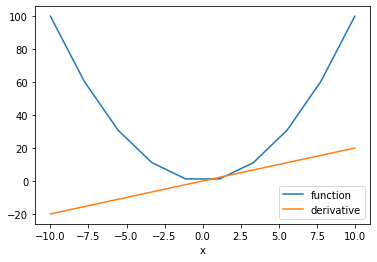

In [80]:
x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)
print(x,y)

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

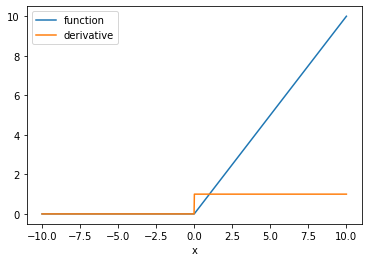

In [81]:
import torch 
import matplotlib.pylab as plt

x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

In [82]:
u = torch.tensor(2.0, requires_grad=True)
v = torch.tensor(1.0, requires_grad=True)
f = u*v + (u*v)**2

f.backward()
print(u,v,f,u.grad)

tensor(2., requires_grad=True) tensor(1., requires_grad=True) tensor(6., grad_fn=<AddBackward0>) tensor(5.)


In [4]:
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

class Dataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [5]:
directory=""
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


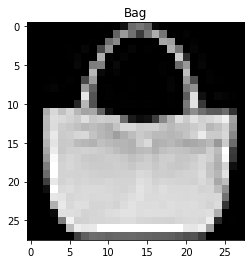

In [8]:
image_name =data_name.iloc[100, 1]
image_path=os.path.join(directory,image_name)
image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[100, 0])
plt.show()

In [12]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

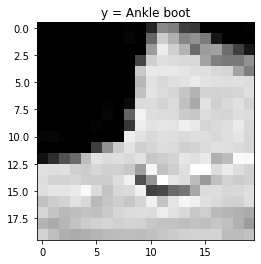

In [18]:
import torchvision.transforms as transforms
croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=croptensor_data_transform )
show_data(dataset[0], shape = (20,20))

In [56]:
import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

class toy_set(Dataset):
    
    # Constructor with defult values 
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 3 * torch.ones(length, 3)
        self.y = 1 *torch.ones(length, 2)
        self.transform = transform
     
    # Getter
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length
    def __len__(self):
        return self.len

In [57]:
class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 3, muly = 3):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

In [59]:
transform_dataset = toy_set(transform = add_mult())
data_set = toy_set()

for i in range(5):
    print(data_set[i])
    print(transform_dataset[i])

(tensor([3., 3., 3.]), tensor([1., 1.]))
(tensor([6., 6., 6.]), tensor([3., 3.]))
(tensor([3., 3., 3.]), tensor([1., 1.]))
(tensor([6., 6., 6.]), tensor([3., 3.]))
(tensor([3., 3., 3.]), tensor([1., 1.]))
(tensor([6., 6., 6.]), tensor([3., 3.]))
(tensor([3., 3., 3.]), tensor([1., 1.]))
(tensor([6., 6., 6.]), tensor([3., 3.]))
(tensor([3., 3., 3.]), tensor([1., 1.]))
(tensor([6., 6., 6.]), tensor([3., 3.]))


In [88]:
class addmultiply(object):
    def __init__(self, add = 2, multiply = 2):
        self.add = add
        self.multiply = multiply
        
    def __call__(self,sample):
        sample = sample[0] + self.add, sample[1] * self.multiply
        return sample
        
dataset2 = toy_set(transform = addmultiply())
for i in range(3):
    print(dataset2[i])

(tensor([5., 5., 5.]), tensor([2., 2.]))
(tensor([5., 5., 5.]), tensor([2., 2.]))
(tensor([5., 5., 5.]), tensor([2., 2.]))


In [89]:
from torchvision import transforms
composed = transforms.Compose([addmultiply(), add_mult()])
dataset3 = toy_set(transform = composed)
for i in range(3):
    print(dataset3[i])

(tensor([8., 8., 8.]), tensor([6., 6.]))
(tensor([8., 8., 8.]), tensor([6., 6.]))
(tensor([8., 8., 8.]), tensor([6., 6.]))


In [2]:
a=torch.tensor([7,4,3,2,1])
print(a, a.dtype, a.type())

tensor([7, 4, 3, 2, 1]) torch.int64 torch.LongTensor


In [28]:
b=torch.FloatTensor([0,1,2,3,4])
print(b, b.dtype, b.type())

tensor([0., 1., 2., 3., 4.]) torch.float32 torch.FloatTensor


In [4]:
c=b.type(torch.LongTensor)
print(c, c.dtype, c.type(), c.size(), c.ndimension())

tensor([0, 1, 2, 3, 4]) torch.int64 torch.LongTensor torch.Size([5]) 1


In [44]:
a_col = c.view(5,1)
print(a_col, a_col.dtype, a_col.type(), a_col.size(), a_col.ndimension())

tensor([[0],
        [1],
        [2],
        [3],
        [4]]) torch.int64 torch.LongTensor torch.Size([5, 1]) 2


In [27]:
a_col = torch.reshape(c,(1,5))
print(a_col, a_col.dtype, a_col.type(), a_col.size(), a_col.ndimension())

tensor([[0, 1, 2, 3, 4]]) torch.int64 torch.LongTensor torch.Size([1, 5]) 2


In [7]:
print(a_col[0].item())

0


In [8]:
b_col = a_col[1:4]
print(b_col, b_col.dtype, b_col.type(), b_col.size(), b_col.ndimension())

tensor([[1],
        [2],
        [3]]) torch.int64 torch.LongTensor torch.Size([3, 1]) 2


In [9]:
b_col = a_col[1:4] + 1
print(b_col, b_col.dtype, b_col.type(), b_col.size(), b_col.ndimension())

tensor([[2],
        [3],
        [4]]) torch.int64 torch.LongTensor torch.Size([3, 1]) 2


In [46]:
z = b_col * a_col.T // hadamard product
print(z, z.dtype, z.type(), z.size(), z.ndimension(), z.numel())

tensor([[ 0,  2,  4,  6,  8],
        [ 0,  3,  6,  9, 12],
        [ 0,  4,  8, 12, 16]]) torch.int64 torch.LongTensor torch.Size([3, 5]) 2 15


In [25]:
u = a_col[1:3]
u = torch.reshape(u, (1,-1))
print(u, u.dtype, u.type(), u.size(), u.ndimension())


tensor([[1, 2]]) torch.int64 torch.LongTensor torch.Size([1, 2]) 2


In [32]:
print(b, b.dtype, b.type(), b.size(), b.ndimension())
v = torch.dot(b,b) // shows how two are similar
print(v, v.dtype, v.type(), v.size(), v.ndimension())

tensor([0., 1., 2., 3., 4.]) torch.float32 torch.FloatTensor torch.Size([5]) 1
tensor(30.) torch.float32 torch.FloatTensor torch.Size([]) 0


In [33]:
mean = b.mean()
max = b.max()
print(mean,max)

tensor(2.) tensor(4.)


In [36]:
import numpy as np
x = torch.tensor([0,np.pi/2,np.pi])
y = torch.cos(x)
print(y)

tensor([ 1.0000e+00, -4.3711e-08, -1.0000e+00])


In [37]:
series = torch.linspace(-2,2,steps=5)
print(series)

tensor([-2., -1.,  0.,  1.,  2.])


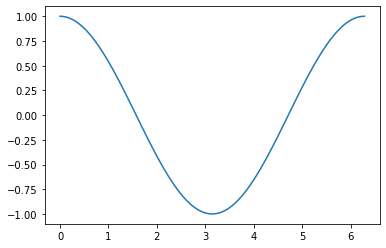

In [42]:
series = torch.linspace(0,np.pi*2,100)
y = torch.cos(series)

import matplotlib.pyplot as plt
# %matplotlib inline
plt.plot(series.numpy(), y.numpy())

In [48]:
u = torch.tensor([[0,1,1],[1,0,1]])
v = torch.tensor([[1,1],[1,1],[-1,1]])
z = torch.mm(u,v)
print(z, z.dtype, z.type(), z.size(), z.ndimension(), z.numel())


tensor([[0, 2],
        [0, 2]]) torch.int64 torch.LongTensor torch.Size([2, 2]) 2 4


In [50]:
u = torch.tensor([[0,1,1],[1,0,1]])
v = u.T
z = torch.mm(u,v)
print(z, z.dtype, z.type(), z.size(), z.ndimension(), z.numel())


tensor([[2, 1],
        [1, 2]]) torch.int64 torch.LongTensor torch.Size([2, 2]) 2 4


In [51]:
u = torch.tensor([[0,1,1],[1,0,1]])
v = u.T
z = torch.dot(u,v)
print(z, z.dtype, z.type(), z.size(), z.ndimension(), z.numel())


RuntimeError: 1D tensors expected, got 2D, 2D tensors at /pytorch/aten/src/TH/generic/THTensorEvenMoreMath.cpp:83